In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
def list_files(directory, extension):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

def compare_all_curve(rpt_file_paths, excel_file_paths, plot_title):
    plt.figure(figsize=(8, 6))

    for rpt_file_path, excel_file_path in zip(rpt_file_paths, excel_file_paths):
        # Reading the .rpt file with latin-1 encoding
        with open(rpt_file_path, 'r', encoding='latin-1') as file:
            rpt_content = file.readlines()

        # Parse the numeric data from the .rpt file
        rpt_data = []
        for line in rpt_content:
            if line.strip() and not line.startswith(('X', 'Displacement', 'Force')):
                values = line.split()
                if len(values) == 3:
                    try:
                        displacement = float(values[1])
                        force = float(values[2])
                        rpt_data.append([displacement, force])
                    except ValueError:
                        continue

        rpt_data = np.array(rpt_data)

        # Check if rpt_data is 2D
        if rpt_data.ndim != 2 or rpt_data.shape[1] != 2:
            raise ValueError(f"Parsed .rpt data from {rpt_file_path} is not in the expected 2D format")

        # Convert the .rpt file force values from N to kN
        rpt_data_converted = rpt_data.copy()
        rpt_data_converted[:, 1] = rpt_data[:, 1] / 1000  # Convert N to kN

        # Load the Excel data
        excel_df = pd.read_excel(excel_file_path)

        # Extract relevant columns from the Excel file
        displacement_col_excel = excel_df.columns[0]  # First column for displacement
        force_col_excel = excel_df.columns[1]         # Second column for force
        upper_col_excel = excel_df.columns[2]          # Third column for upper bound
        lower_col_excel = excel_df.columns[3]          # Fourth column for lower bound

        displacement_data_excel = excel_df[displacement_col_excel]
        force_data_excel = excel_df[force_col_excel]
        upper_data_excel = excel_df[upper_col_excel]
        lower_data_excel = excel_df[lower_col_excel]

        # Plot the .rpt data (converted to kN)
        plt.plot(rpt_data_converted[:, 0], rpt_data_converted[:, 1], label=f"{os.path.basename(rpt_file_path).split('_')[-1].replace('.txt', '')}_sim", linestyle='-', marker='')

        # Plot the Excel data (already in kN)
        plt.scatter(displacement_data_excel[::30], force_data_excel[::30], label=f"{os.path.basename(excel_file_path).split('_')[-1].replace('.xlsx', '')}_exp", marker='o')

        # Plot the upper and lower bounds
        #  plt.errorbar(displacement_data_excel[::30], force_data_excel[::30], yerr=[np.abs(force_data_excel[::30] - lower_data_excel[::30]), np.abs(upper_data_excel[::30] - force_data_excel[::30])], fmt='o', color='black', alpha=0.5)

    # Labels and title
    plt.title(plot_title)
    plt.xlabel("Displacement, mm")
    plt.ylabel("Force, kN")
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(left=0, right=2)
    plt.ylim(bottom=0, top=22.5)
    
    # Show the combined plot
    plt.show()

In [7]:
def process_directory(directory):
    # List all .txt and .xlsx files in the directory
    rpt_files = list_files(directory, ".txt")
    excel_files = list_files(directory, ".xlsx")

    # Ensure the lists are sorted to match pairs correctly
    rpt_files.sort()
    excel_files.sort()

    return rpt_files, excel_files


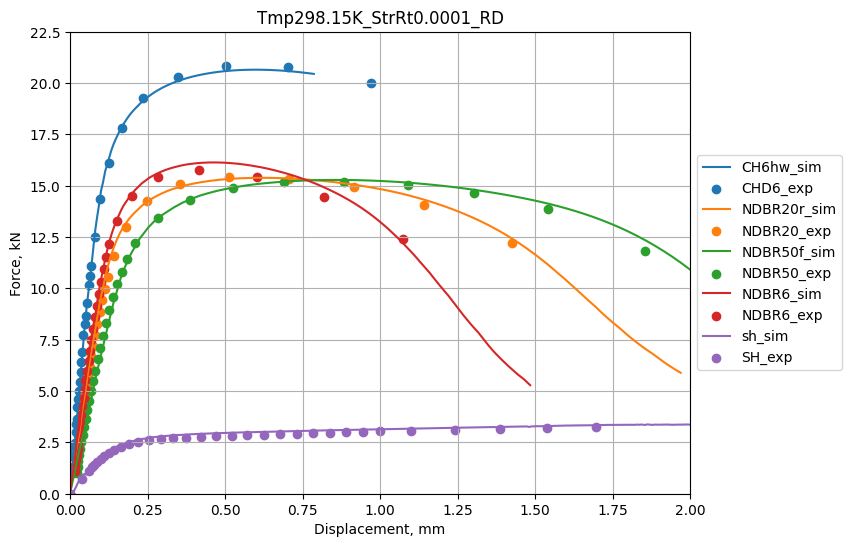

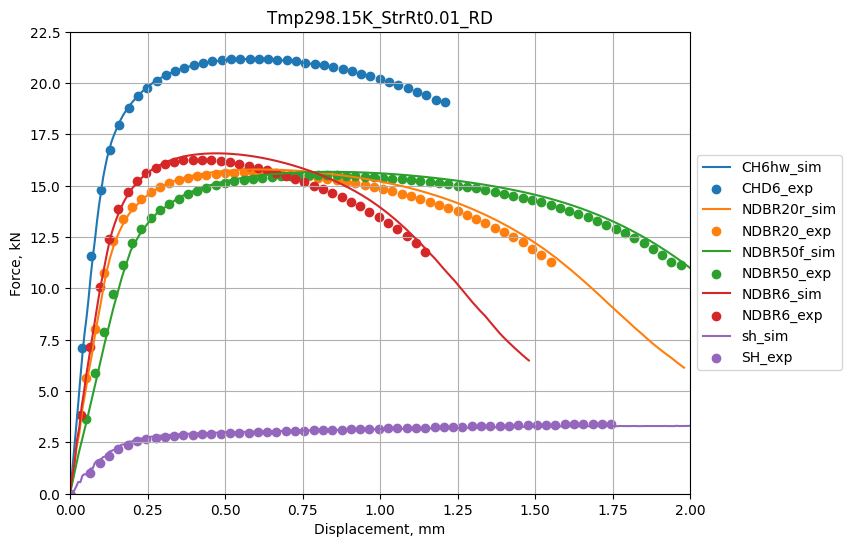

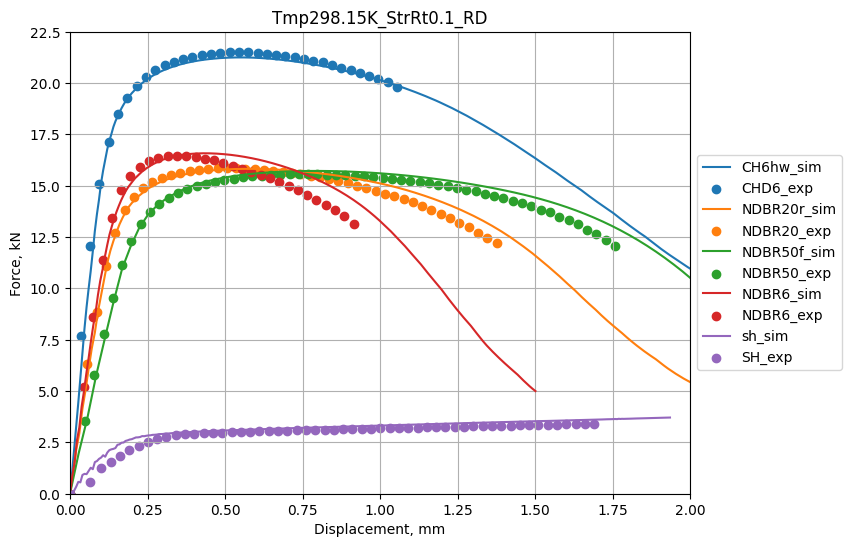

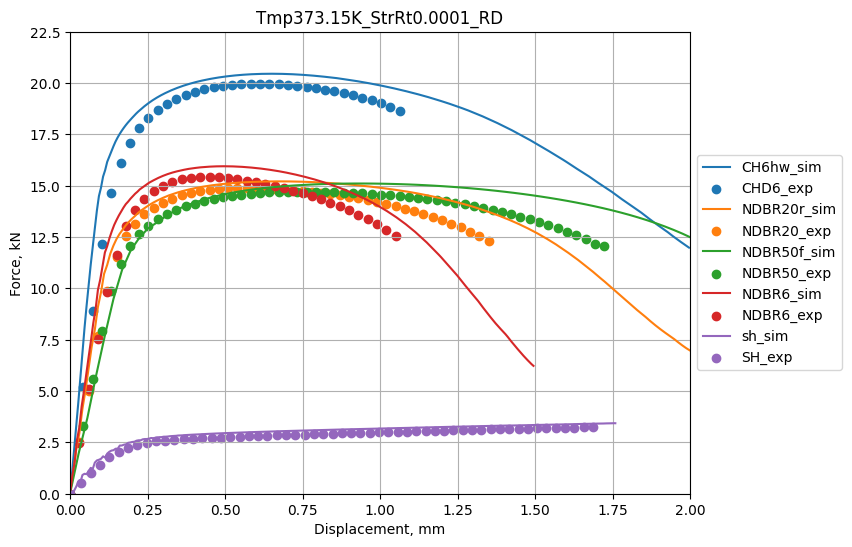

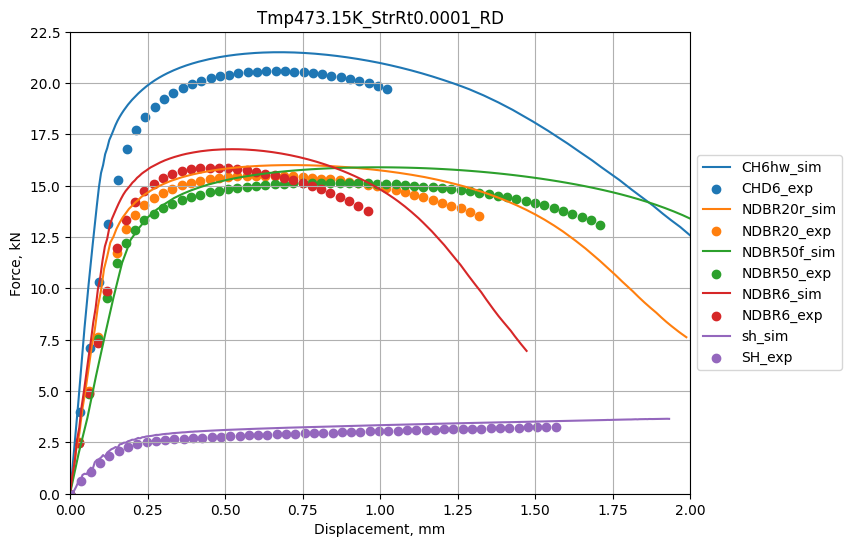

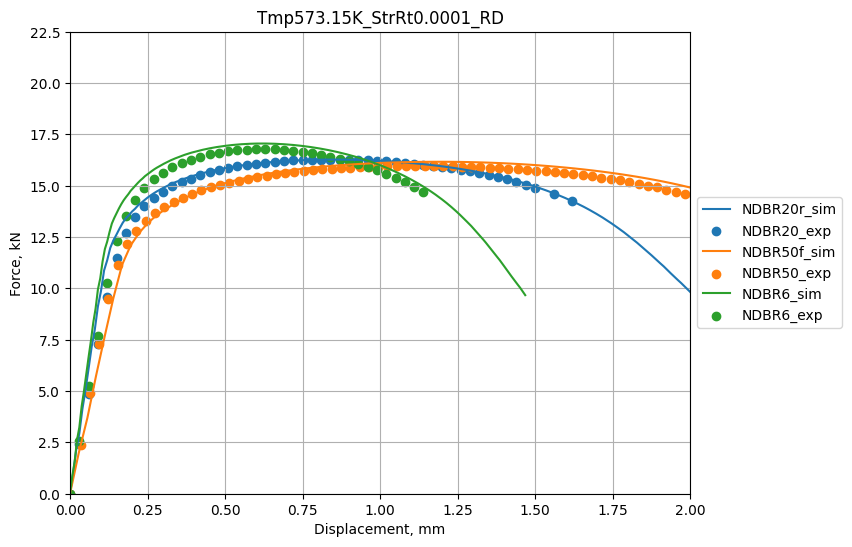

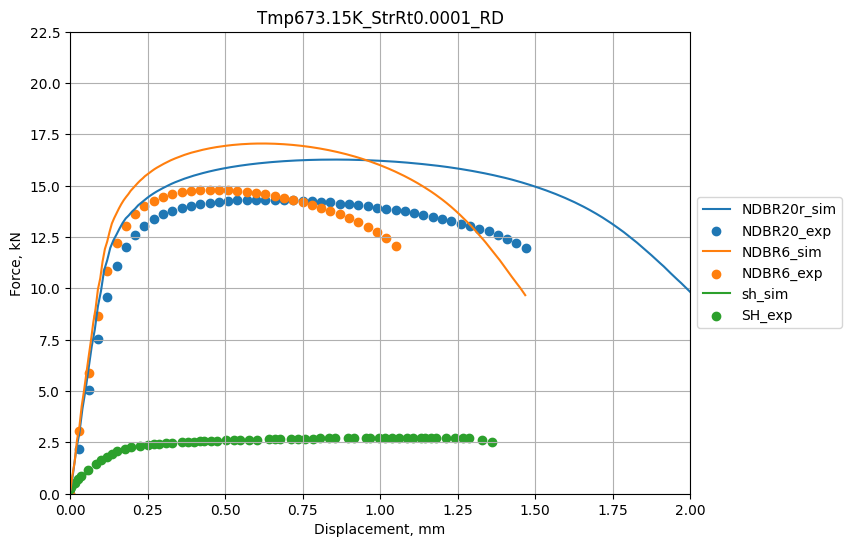

In [8]:
def process_all_subdirectories(base_directory):
    subdirectories = [os.path.join(base_directory, sub_dir) for sub_dir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, sub_dir))]
    
    for subdirectory in subdirectories:
        rpt_files, excel_files = process_directory(subdirectory)
        if rpt_files and excel_files:
            plot_title = os.path.basename(subdirectory)
            compare_all_curve(rpt_files, excel_files, plot_title)

# Example usage
base_directory = "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot"
process_all_subdirectories(base_directory)